C:\Users\ghdls\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


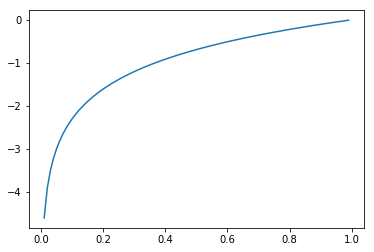

In [30]:
#http://www.gisdeveloper.co.kr/?p=7631

import numpy as np
import matplotlib.pyplot as plt
 
a = np.arange(0, 1, 0.01)
b = np.log(a)
 
plt.plot(a, b)
plt.show()

In [27]:
import numpy as np

def CEE(y, t):
    delta = 1e-10
    return -np.sum(t*np.log(y+delta))

t = np.array([0, 0, 0, 0.5, 0.5, 0, 0, 0, 0, 0])
y0 = [0, 0, 0, 0.5, 0.5, 0, 0, 0, 0, 0]
y1 = [0.01, 0.01, 0.1, 0.3, 0.33, 0.04, 0.02, 0.05, 0.01, 0.1]
y2 = np.array([0.3, 0.01, 0.1, 0.01, 0.04, 0.02, 0.05, 0.33, 0.01, 0.1])

## 실제값에서 예측값이 멀어질 수록 손실값이 커지는 것을 알 수 있음
print(CEE(t,y0)) # 0.6931471803599453
print(CEE(t,y1)) # 8.265472039806522
print(CEE(t,y2)) # 21.21844021456322   

0.6931471803599453
8.265472039806522
21.21844021456322


In [31]:
# nn.NLLLoss 구현코드
import torch

def NLLLoss(logs, targets):
    out = torch.zeros_like(targets, dtype=torch.float)
    for i in range(len(targets)):
        out[i] = logs[i][targets[i]]
    return -out.sum()/len(out)

In [32]:
x = torch.Tensor([[0.8982, 0.805, 0.6393, 0.9983, 0.5731, 0.0469, 0.556, 0.1476, 0.8404, 0.5544]])
y = torch.LongTensor([1])

In [33]:
# Case 1
cross_entropy_loss = torch.nn.CrossEntropyLoss()
print(cross_entropy_loss(x, y)) # tensor(2.1438)

tensor(2.1438)


In [35]:
# Case 2
log_softmax = torch.nn.LogSoftmax(dim=1)
x_log = log_softmax(x)
print(NLLLoss(x_log, y)) # tensor(2.1438)

tensor(2.1438)


In [36]:
# Case 3
nll_loss = torch.nn.NLLLoss()
print(nll_loss(x_log, y)) # tensor(2.1438)

tensor(2.1438)


위의 세가지 방식 중 torch.nn.CrossEntropyLoss처럼 연산을 한번에 처리하는 것이 수식이 간소화되어 역전파가 더 안정적으로 이루지므로 실제 사용에 권장됩니다.

----------------------------------
신경망 학습에서 손실값이 필요한데, 학습에서 데이터는 GPU 자원을 최대한 활용하기 위해 배치 단위로 처리됩니다. 즉, 앞서 언급한 것처럼 1개 단위가 아닌 2개 이상의 데이터가 한꺼번에 들어온다는 것입니다. 이에 대한 처리에 대한 예는 다음 코드와 같습니다.

In [38]:
import torch
import torch.nn as nn
import numpy as np

output = torch.Tensor(
    [
        [0.8982, 0.805, 0.6393, 0.9983, 0.5731, 0.0469, 0.556, 0.1476, 0.8404, 0.5544],
        [0.9457, 0.0195, 0.9846, 0.3231, 0.1605, 0.3143, 0.9508, 0.2762, 0.7276, 0.4332]
    ]
)

target = torch.LongTensor([1, 5])
criterion = nn.CrossEntropyLoss()
loss = criterion(output, target)

print(loss) # tensor(2.3519)

tensor(2.3519)


In [39]:
import torch
import torch.nn as nn
import numpy as np

output = [0.8982, 0.805, 0.6393, 0.9983, 0.5731, 0.0469, 0.556, 0.1476, 0.8404, 0.5544]
target = [1]
loss1 = np.log(sum(np.exp(output))) - output[target[0]]

output = [0.9457, 0.0195, 0.9846, 0.3231, 0.1605, 0.3143, 0.9508, 0.2762, 0.7276, 0.4332]
target = [5]
loss2 = np.log(sum(np.exp(output))) - output[target[0]]

print((loss1 + loss2)/2) # 2.351937720511233

2.351937720511233
